# CHAPTER6. 연습문제

## 1. 물질의 화학적 구성 판단

- 215개 육류 샘플을 100개의 주파에 대해 분석

(a) R 을 켜서 데이터를 로딩한다.

In [1]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
data(tecator)

In [3]:
?tecator

- absorp 행렬에는 215개의 샘플에 대한 100개의 흡수율값이 있고,**행렬 끝의 1~3열**에는 각각 **수분, 지방, 단백질 함유량**이 들어 있다.

- absorp 행렬은 예측변수, endpoints 행렬이 반응 변수로 쓰일 것이다.

In [7]:
head(absorp)

2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,3.00247,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920
2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.30473,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942
2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.70934,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816
2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.99820,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622
2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.32201,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753
3.00993,3.01540,3.02086,3.02634,3.03190,3.03756,3.04341,3.04955,3.05599,3.06274,...,3.57163,3.55877,3.54651,3.53442,3.52221,3.50972,3.49682,3.48325,3.46870,3.45307


In [43]:
head(endpoints)

60.5,22.5,16.7
46.0,40.1,13.5
71.0,8.4,20.5
72.8,5.9,20.7
58.3,25.5,15.5
44.0,42.7,13.7


In [8]:
str(absorp)

 num [1:215, 1:100] 2.62 2.83 2.58 2.82 2.79 ...


In [44]:
str(endpoints)

 num [1:215, 1:3] 60.5 46 71 72.8 58.3 44 44 69.3 61.4 61.4 ...


(b) 이 예제에서 예측 변수는 각각의 빈도에 대한 측정값이다. 빈도는 체계적인 순서대로 들어 있다 보니(850 ~ 1,050nm), 예측 변수 간에 높은 상관성이 나타난다. 따라서 예측 변수의 개수(215개)보다 적은 차원의 데이터를 사용한다. PCA를 통해 이 데이터의 효율적인 차원의 수를 판단해 보자. **효율적인 차원**은 얼마인가?

In [15]:
p <- prcomp(absorp, center= T, scale = T)

In [17]:
pctVar <- p$sdev^2 / sum(p$sdev^2) * 100 

In [18]:
pctVar

[1] 9.862619e+01 9.697052e-01 2.793243e-01 1.144299e-01 6.460911e-03
  [6] 2.624591e-03 7.187142e-04 3.845050e-04 7.334607e-05 4.541974e-05
 [11] 1.973046e-05 1.129532e-05 3.486391e-06 1.894955e-06 8.928848e-07
 [16] 7.466589e-07 5.712468e-07 4.867969e-07 3.461558e-07 2.141707e-07
 [21] 1.518324e-07 1.116549e-07 9.751608e-08 7.406101e-08 6.841623e-08
 [26] 4.451079e-08 3.818786e-08 3.449679e-08 2.990585e-08 2.743019e-08
 [31] 2.367618e-08 2.169414e-08 1.938508e-08 1.792723e-08 1.609576e-08
 [36] 1.170488e-08 1.082216e-08 9.959132e-09 8.246911e-09 7.513165e-09
 [41] 6.442059e-09 6.024785e-09 5.417274e-09 4.634587e-09 4.278145e-09
 [46] 4.147502e-09 3.477545e-09 2.940274e-09 2.526773e-09 2.394106e-09
 [51] 2.123406e-09 1.952661e-09 1.629972e-09 1.485678e-09 1.443771e-09
 [56] 1.324795e-09 1.222603e-09 1.185146e-09 1.065194e-09 9.637202e-10
 [61] 9.239745e-10 8.752905e-10 8.089090e-10 7.287233e-10 6.689379e-10
 [66] 5.701846e-10 5.590554e-10 5.218165e-10 4.720851e-10 4.236164e-10
 [71] 3.988815e-10 3.726435e-10 3.436936e-10 3.265825e-10 2.985408e-10
 [76] 2.866723e-10 2.598605e-10 2.461821e-10 2.299603e-10 2.089324e-10
 [81] 1.983737e-10 1.838536e-10 1.625848e-10 1.497686e-10 1.387904e-10
 [86] 1.188590e-10 1.091605e-10 1.018667e-10 8.828800e-11 7.617450e-11
 [91] 6.839344e-11 5.796070e-11 4.664780e-11 4.074585e-11 3.535187e-11
 [96] 3.000842e-11 2.329246e-11 2.043620e-11 1.733519e-11 1.698749e-11

- 1개의 주성분으로 전체 변동의 98.6%를 설명할 수 있다.

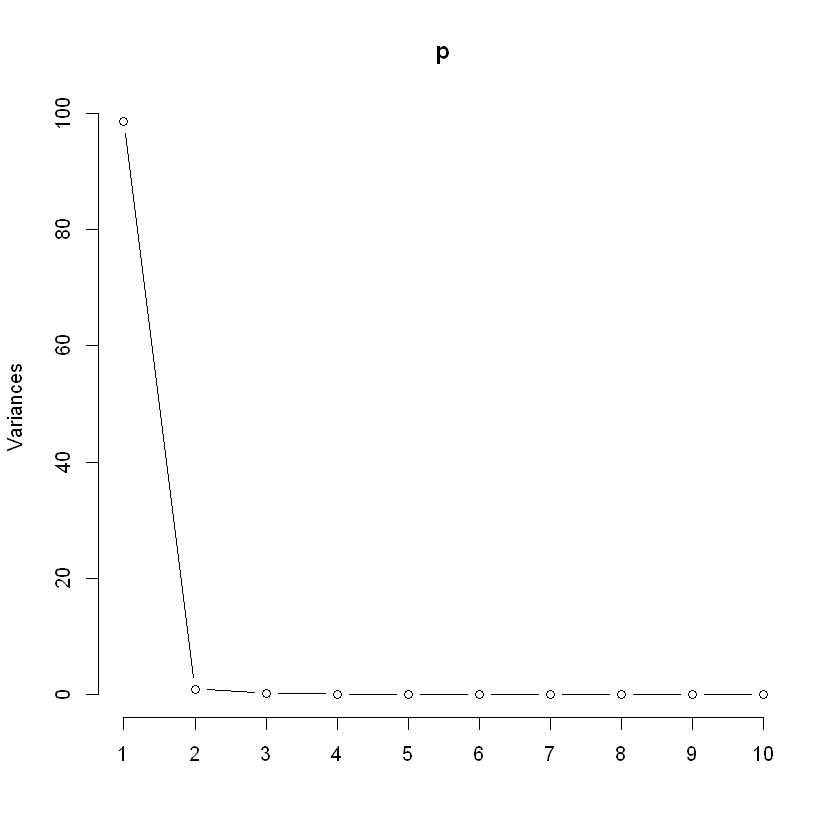

In [16]:
screeplot(p, npcs = 10, type = "lines")

(c) 데이터를 훈련 세트와 테스트 세트로 나누고 전처리한 후, 이 장에서 나온 다양한 모델을 적용해보자. 이 모델을 튜닝하는 경우, 튜닝 인수의 최적값은 얼마인가?

- 데이터 분할

In [19]:
set.seed(1004)

In [20]:
inMeatTraining <- createDataPartition(endpoints[,3], p = 3/4, list=FALSE) # Train 75%, Test 25%로 분할할 것임

In [46]:
absorpTrain <- absorp[inMeatTraining,]
absorpTest <- absorp[-inMeatTraining,]

In [56]:
absorpTrain <- as.data.frame(absorpTrain)

In [58]:
absorpTest <- as.data.frame(absorpTest)

In [53]:
str(absorpTrain)

 num [1:163, 1:100] 2.62 2.83 2.58 2.82 2.79 ...


In [47]:
proteinTrain <- endpoints[inMeatTraining,3]
proteinTest <- endpoints[-inMeatTraining,3]

In [54]:
str(proteinTrain)

 num [1:163] 16.7 13.5 20.5 20.7 15.5 13.7 13.7 19.3 17.7 17.7 ...


In [61]:
ctrl <- trainControl(method="repeatedcv", number=10, repeats = 5) # 10-fold CV를 5번 반복하여 가장 좋은 후보의 파라미터 그리드를 찾게 한다.

- 모형 적합

In [49]:
set.seed(502)

In [57]:
meatLM <- train(x = absorpTrain, y = proteinTrain, method = "lm", trControl = ctrl)

In [62]:
meatLM

Linear Regression 

163 samples
100 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 147, 148, 146, 147, 147, 146, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  1.430337  0.8074329  0.9314441

Tuning parameter 'intercept' was held constant at a value of TRUE

In [78]:
meatPLS <- train(x = absorpTrain, y = proteinTrain, 
                 method = "pls", 
                 trControl = ctrl,
                tuneLength = 25)

In [79]:
meatPLS

Partial Least Squares 

163 samples
100 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 146, 146, 147, 148, 147, 146, ... 
Resampling results across tuning parameters:

  ncomp  RMSE       Rsquared   MAE      
   1     2.8638198  0.1355567  2.4464685
   2     2.1989272  0.4729260  1.7392220
   3     1.7370406  0.6627022  1.2768824
   4     1.5333060  0.7314303  1.1697324
   5     1.1920076  0.8504575  0.9634359
   6     1.1059376  0.8712577  0.9074462
   7     1.0569052  0.8813774  0.8605135
   8     0.9696922  0.9005839  0.7903158
   9     0.9055291  0.9172822  0.7329252
  10     0.8563940  0.9250247  0.6809880
  11     0.7647464  0.9372350  0.6109695
  12     0.6861870  0.9531565  0.5382337
  13     0.6707836  0.9546850  0.5281806
  14     0.6642074  0.9552055  0.5208182
  15     0.6721212  0.9534079  0.5180098
  16     0.6962017  0.9499978  0.5278978
  17     0.7051798  0.9484573  0.5346544
  18     0.7352615  0.9383542

In [80]:
meatPCR <- train(x = absorpTrain, y = proteinTrain, 
                 method = "pcr", 
                 trControl = ctrl,
                tuneLength = 25)

In [81]:
meatPCR

Principal Component Analysis 

163 samples
100 predictors

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 146, 147, 147, 147, 147, 147, ... 
Resampling results across tuning parameters:

  ncomp  RMSE       Rsquared   MAE      
   1     2.8767630  0.1515187  2.4632912
   2     2.6770895  0.2221257  2.1865695
   3     2.2065888  0.4778164  1.7613655
   4     1.5824157  0.7133553  1.1956511
   5     1.4103653  0.7791445  1.1005661
   6     1.1232770  0.8684015  0.9129093
   7     1.1237314  0.8682899  0.9168145
   8     1.1150692  0.8694036  0.9097456
   9     1.0917091  0.8745625  0.8997649
  10     0.9546760  0.9049362  0.7679942
  11     0.9621105  0.9013715  0.7632311
  12     0.8788768  0.9187650  0.7117832
  13     0.7780074  0.9360704  0.6233728
  14     0.7434190  0.9434553  0.5826568
  15     0.6815905  0.9531430  0.5458448
  16     0.6678576  0.9547202  0.5355242
  17     0.6795819  0.9525293  0.5402814
  18     0.7050629  0.

In [71]:
ridgeGrid <- expand.grid(lambda = seq(0, .1, length = 15))

meatRidge <- train(x = absorpTrain, y = proteinTrain, 
                   method = "ridge", 
                   tuneGrid = ridgeGrid,
                   trControl = ctrl,
                  preProc = c("center", "scale"))

In [72]:
meatRidge

Ridge Regression 

163 samples
100 predictors

Pre-processing: centered (100), scaled (100) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 147, 147, 147, 147, 146, 147, ... 
Resampling results across tuning parameters:

  lambda       RMSE      Rsquared   MAE     
  0.000000000  1.427514  0.8217638  0.935735
  0.007142857  1.322822  0.8180611  1.030097
  0.014285714  1.429359  0.7854807  1.094803
  0.021428571  1.490275  0.7665356  1.130837
  0.028571429  1.531852  0.7537476  1.156836
  0.035714286  1.563526  0.7441646  1.177178
  0.042857143  1.589432  0.7364373  1.194362
  0.050000000  1.611640  0.7298726  1.209300
  0.057142857  1.631296  0.7240821  1.223591
  0.064285714  1.649081  0.7188331  1.237703
  0.071428571  1.665425  0.7139790  1.252671
  0.078571429  1.680617  0.7094233  1.267465
  0.085714286  1.694855  0.7051002  1.281573
  0.092857143  1.708286  0.7009636  1.295106
  0.100000000  1.721017  0.6969805  1.307835

RMSE was used to select

In [94]:
LASSOGrid <- expand.grid(fraction = seq(.05, 1, length = 20))

In [95]:
meatLASSO <- train(x = absorpTrain, y = proteinTrain, 
                   method = "lasso",
                   tuneGrid = LASSOGrid,
                   trControl = ctrl,
                  preProc = c("center", "scale"))

In [96]:
meatLASSO

The lasso 

163 samples
100 predictors

Pre-processing: centered (100), scaled (100) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 147, 146, 147, 147, 147, 147, ... 
Resampling results across tuning parameters:

  fraction  RMSE       Rsquared   MAE      
  0.05      0.8258517  0.9125535  0.5551349
  0.10      0.9455193  0.8856111  0.5938891
  0.15      1.0092004  0.8726959  0.6261495
  0.20      1.0484952  0.8643941  0.6482135
  0.25      1.0916313  0.8561058  0.6714435
  0.30      1.1488195  0.8457461  0.7035065
  0.35      1.1908512  0.8401882  0.7313262
  0.40      1.2274813  0.8357295  0.7582050
  0.45      1.2582683  0.8318990  0.7817464
  0.50      1.2844434  0.8284773  0.8002595
  0.55      1.3064036  0.8255677  0.8172100
  0.60      1.3322847  0.8215527  0.8355627
  0.65      1.3595930  0.8173708  0.8542352
  0.70      1.3866238  0.8132612  0.8737639
  0.75      1.4143963  0.8088884  0.8941955
  0.80      1.4452709  0.8041005  0.9155579
  0

In [91]:
enetGrid <- expand.grid(lambda = c(0, 0.01, .1), 
                        fraction = seq(.05, 1, length = 20))

meatEnet <- train(x = absorpTrain, y = proteinTrain, 
                   method = "enet", 
                   tuneGrid = enetGrid,
                   trControl = ctrl,
                  preProc = c("center", "scale"))

In [92]:
meatEnet

Elasticnet 

163 samples
100 predictors

Pre-processing: centered (100), scaled (100) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 147, 146, 147, 147, 146, 146, ... 
Resampling results across tuning parameters:

  lambda  fraction  RMSE       Rsquared   MAE      
  0.00    0.05      0.7982863  0.9243982  0.5458103
  0.00    0.10      0.9252634  0.8958645  0.5895239
  0.00    0.15      0.9923364  0.8828655  0.6244370
  0.00    0.20      1.0387343  0.8730811  0.6462747
  0.00    0.25      1.0830868  0.8659595  0.6723427
  0.00    0.30      1.1232659  0.8613733  0.6974709
  0.00    0.35      1.1598334  0.8559937  0.7216308
  0.00    0.40      1.1868522  0.8519091  0.7432981
  0.00    0.45      1.2049488  0.8494618  0.7597723
  0.00    0.50      1.2233830  0.8456956  0.7758998
  0.00    0.55      1.2414911  0.8425519  0.7903421
  0.00    0.60      1.2622063  0.8390370  0.8051295
  0.00    0.65      1.2850283  0.8350404  0.8208098
  0.00    0.70      1.

(d) 어느 모델의 예측력이 가장 좋은가?

- Elastic Net의 lambda = 0, fraction = 0.05 일 때 RMSE = 0.798로 가장 낮다